In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [72]:
def clean_data(data):
    # check for missing values and replace them with the mean of the column
    missing_values = data.isnull().sum()
    
    for column in data.columns:
        if missing_values[column] > 0:
            data[column].fillna(data[column].mode(), inplace=True)
    
    return data


In [73]:
def visualize_numeric(data):
    # visualize the data
    # List of numerical columns
    numerical_columns = ['TotalPremium', 'TotalClaims']

    # Plot histograms for each numerical column
    for col in numerical_columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(data[col], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()


In [74]:
def visualize_categorical(data):
    categorical_columns = ['IsVATRegistered', 'Citizenship', 'LegalType', 'Gender', 'VehicleType', 'make', 'CoverCategory', 'AccountType']

    # Plot bar charts for each categorical column
    for col in categorical_columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=col, data=data, palette='Set2')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)  # Rotate if categories are long
        plt.show()


In [75]:
def Bivariate_Multivariate(data):
    # Scatter Plot: Analyzing Relationships
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='PostalCode', data=data, palette='viridis')
    plt.title('Total Premium vs. Total Claims by PostalCode')
    plt.xlabel('Total Premium')
    plt.ylabel('Total Claims')
    plt.legend(title='PostalCode', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    #Scatter Plot with Regression Line
    plt.figure(figsize=(10, 6))
    sns.regplot(x='TotalPremium', y='TotalClaims', data=data, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'orange'})
    plt.title('Total Premium vs. Total Claims')
    plt.xlabel('Total Premium')
    plt.ylabel('Total Claims')
    plt.show()

    # Correlation Matrix: Analyzing Associations
    # Correlation matrix for numerical features
    numerical_columns = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm']
    correlation_matrix = data[numerical_columns].corr()

    # Plot the correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix of Key Variables')
    plt.show()

    # monthly changes in TotalPremium

    # Convert the transaction month column to datetime if not already
    data['TransactionMonth'] = pd.to_datetime(data['TransactionMonth'])

    # Group by month and calculate the mean TotalPremium and TotalClaims
    monthly_data = data.groupby(data['TransactionMonth'].dt.to_period('M')).agg({
        'TotalPremium': 'mean',
        'TotalClaims': 'mean'
    }).reset_index()

    # Plot monthly changes in TotalPremium and TotalClaims
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_data['TransactionMonth'].astype(str), monthly_data['TotalPremium'], label='Total Premium', marker='o')
    plt.plot(monthly_data['TransactionMonth'].astype(str), monthly_data['TotalClaims'], label='Total Claims', marker='x')
    plt.title('Monthly Changes in Total Premium and Total Claims')
    plt.xlabel('Month')
    plt.ylabel('Amount')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

    # Bivariate analysis of TotalPremium by ZipCode
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='PostalCode', y='TotalPremium', data=data)
    plt.title('Total Premium Distribution by PostalCode')
    plt.xlabel('PostalCode')
    plt.ylabel('Total Premium')
    plt.xticks(rotation=45)
    plt.show()



In [76]:
def data_comparison(data):
    # Group data by PostalCode and calculate the average premium
    premium_by_postalcode = data.groupby('PostalCode')['TotalPremium'].mean().reset_index()
    # Plot the average premium by PostalCode
    plt.figure(figsize=(12, 6))
    sns.barplot(x='PostalCode', y='TotalPremium', data=premium_by_postalcode, palette='Blues_d')
    plt.title('Average Total Premium by PostalCode')
    plt.xlabel('PostalCode')
    plt.ylabel('Average Total Premium')
    plt.xticks(rotation=45)
    plt.show()

    # heatmap of the average premium by Postal
    # Pivot the data to create a heatmap of TotalPremium by PostalCode and Province
    pivot_table = data.pivot_table(values='TotalPremium', index='Province', columns='PostalCode', aggfunc='mean')

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, cmap='coolwarm', annot=True, linewidths=0.5)
    plt.title('Heatmap of Average Total Premium by PostalCode and Province')
    plt.xlabel('PostalCode')
    plt.ylabel('Province')
    plt.show()

In [77]:
def outliers(data):
    # List of numerical columns to visualize
    numerical_columns = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm']

    # Create box plots for each numerical column
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(y=data[col], color='skyblue')
        plt.title(f'Box Plot of {col}')
        plt.ylabel(col)

    plt.tight_layout()
    plt.show()

In [78]:
def eda(data):
    print(data)
    numerical_columns = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm', 'cubiccapacity', 'kilowatts']
    variability = data[numerical_columns].describe()
    print(variability)

    # visualize the numerical data
    visualize_numeric(data)

    # visualize the categorical data
    visualize_categorical(data)

    # Bivariate and Multivariate Analysis
    Bivariate_Multivariate(data)

    # Data Comparison
    data_comparison(data)

    # Outliers
    outliers(data)

    # all the visualization is here
    

    

    


In [79]:
def main():
    data = pd.read_csv('../../data/data.txt', delimiter= '|')
    
    data = clean_data(data)
    eda(data)

/var/folders/b3/zdl2xxh53jgc4hjrq6hk1p9c0000gn/T/ipykernel_2233/365488650.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../../data/data.txt', delimiter= '|')
/var/folders/b3/zdl2xxh53jgc4hjrq6hk1p9c0000gn/T/ipykernel_2233/1946820818.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode(), inplace=True)


         UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0                     145249     12827  2015-03-01 00:00:00             True   
1                     145249     12827  2015-05-01 00:00:00             True   
2                     145249     12827  2015-07-01 00:00:00             True   
3                     145255     12827  2015-05-01 00:00:00             True   
4                     145255     12827  2015-07-01 00:00:00             True   
...                      ...       ...                  ...              ...   
1000093                31520       389  2015-04-01 00:00:00            False   
1000094                31520       389  2015-06-01 00:00:00            False   
1000095                31520       389  2015-08-01 00:00:00            False   
1000096                31519       389  2014-07-01 00:00:00            False   
1000097                31519       389  2015-02-01 00:00:00            False   

        Citizenship          LegalType 

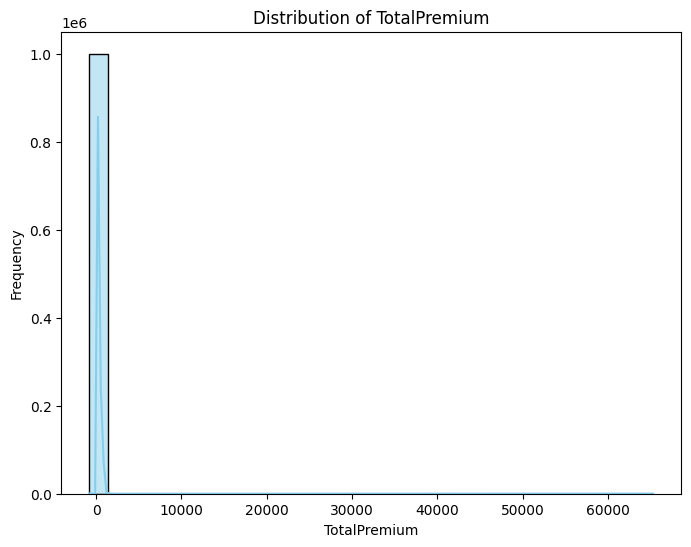

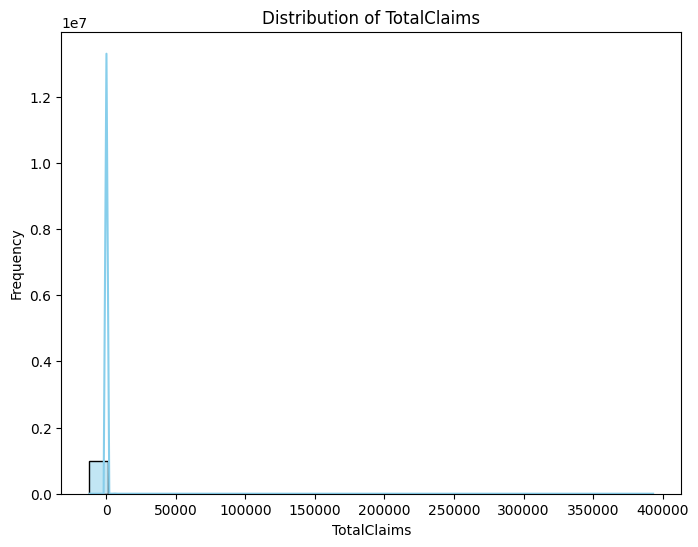

/var/folders/b3/zdl2xxh53jgc4hjrq6hk1p9c0000gn/T/ipykernel_2233/2065567906.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


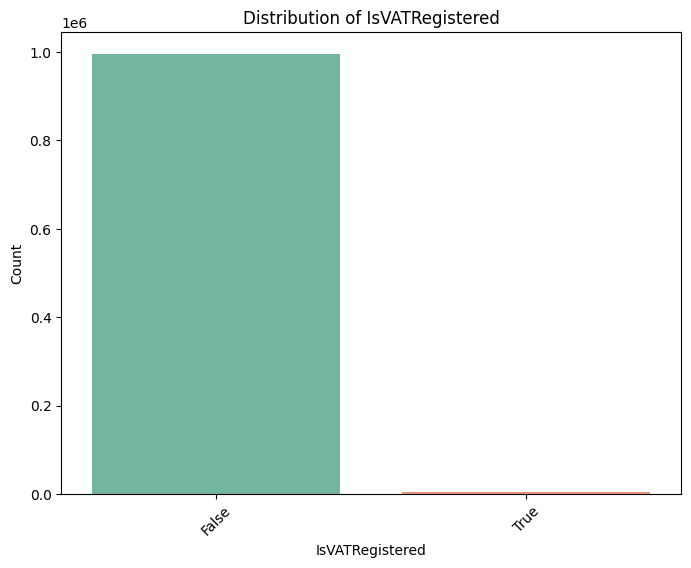

/var/folders/b3/zdl2xxh53jgc4hjrq6hk1p9c0000gn/T/ipykernel_2233/2065567906.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


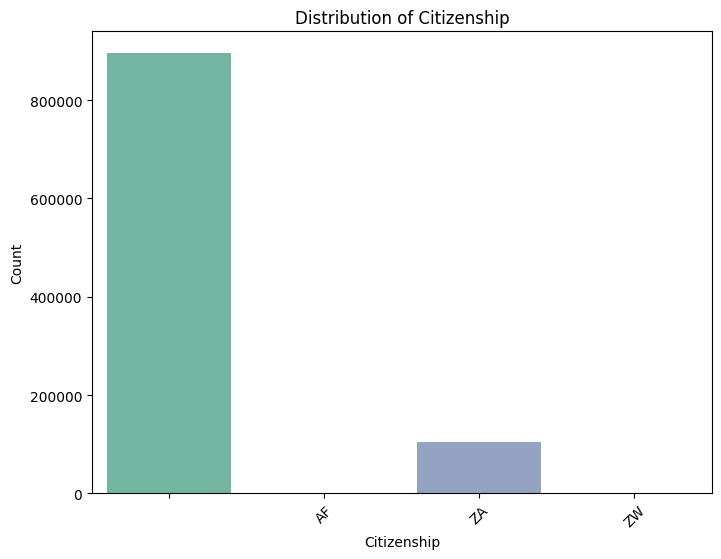

/var/folders/b3/zdl2xxh53jgc4hjrq6hk1p9c0000gn/T/ipykernel_2233/2065567906.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


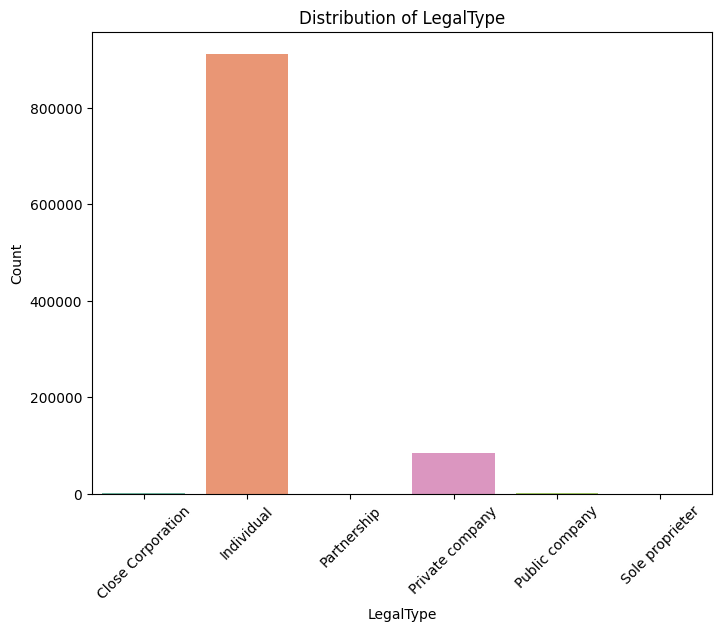

/var/folders/b3/zdl2xxh53jgc4hjrq6hk1p9c0000gn/T/ipykernel_2233/2065567906.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


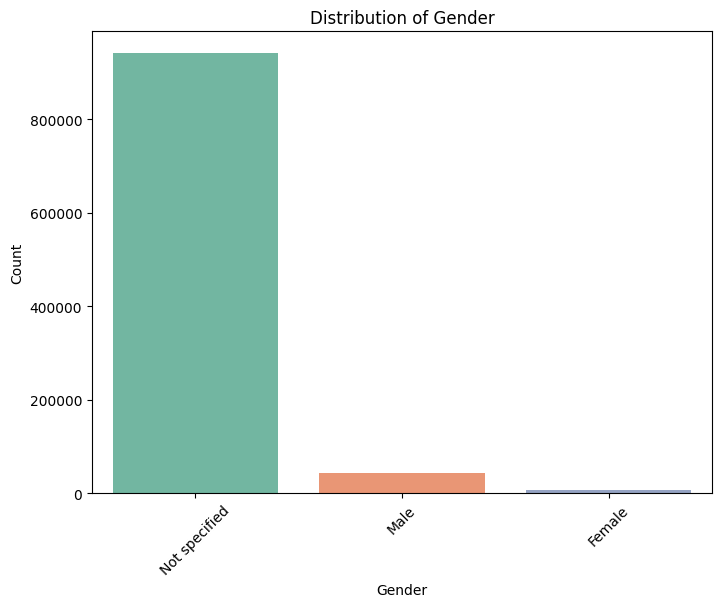

/var/folders/b3/zdl2xxh53jgc4hjrq6hk1p9c0000gn/T/ipykernel_2233/2065567906.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


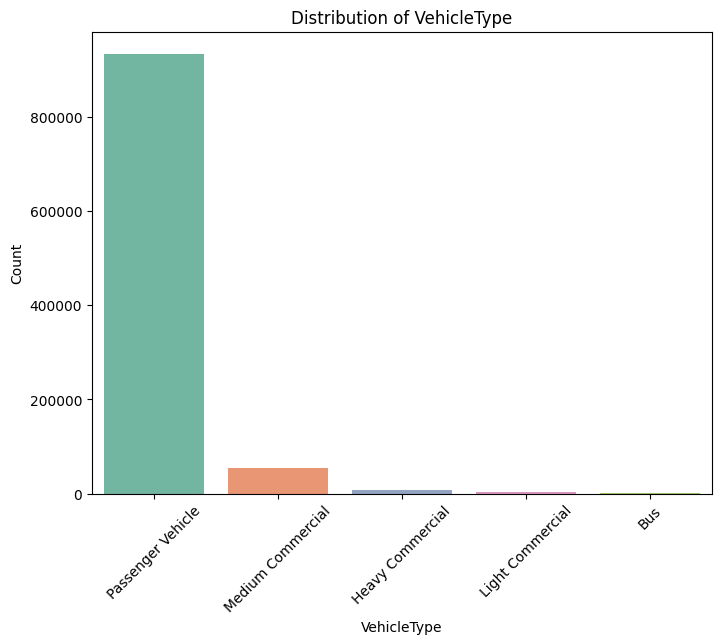

/var/folders/b3/zdl2xxh53jgc4hjrq6hk1p9c0000gn/T/ipykernel_2233/2065567906.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


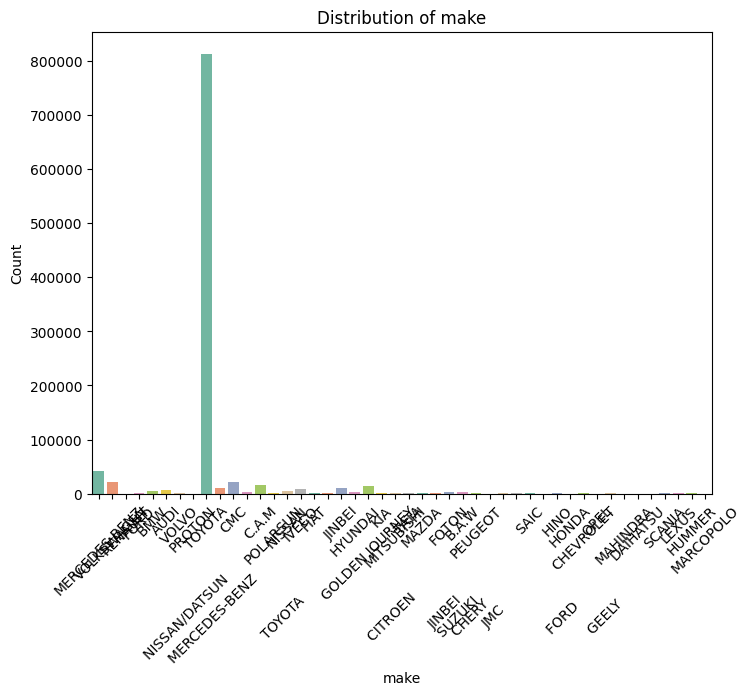

/var/folders/b3/zdl2xxh53jgc4hjrq6hk1p9c0000gn/T/ipykernel_2233/2065567906.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


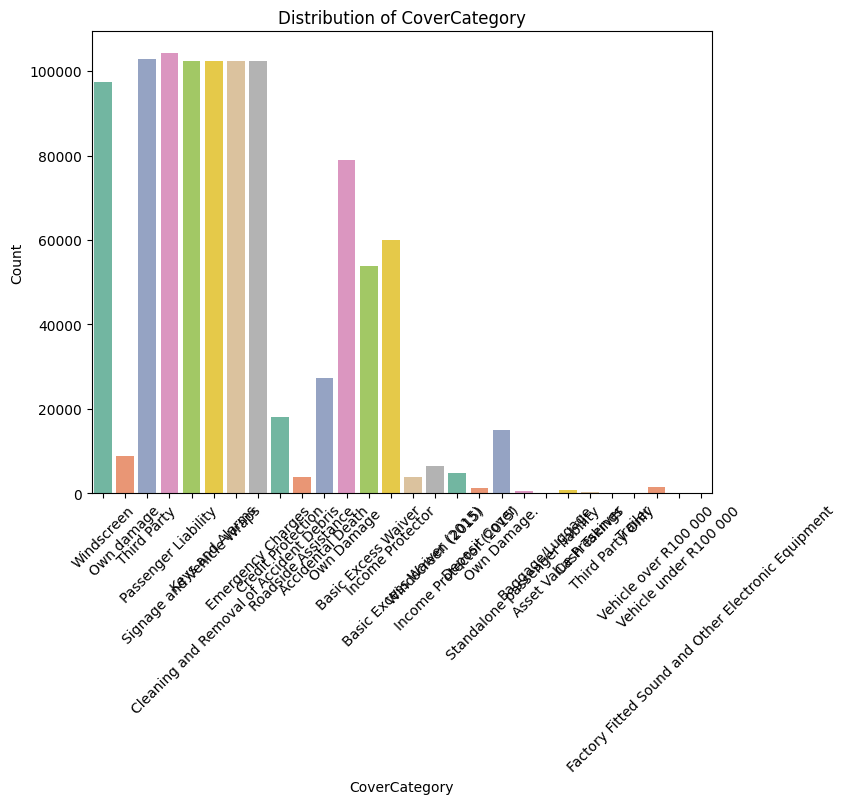

/var/folders/b3/zdl2xxh53jgc4hjrq6hk1p9c0000gn/T/ipykernel_2233/2065567906.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


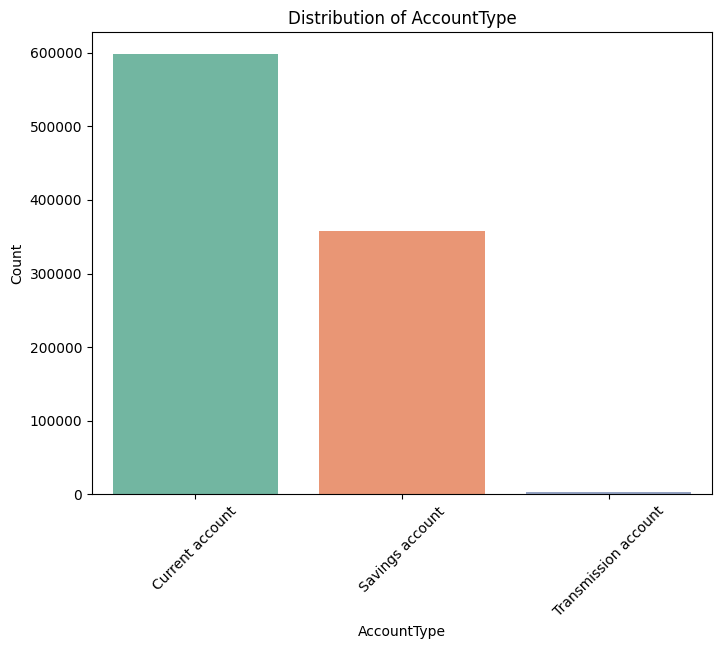

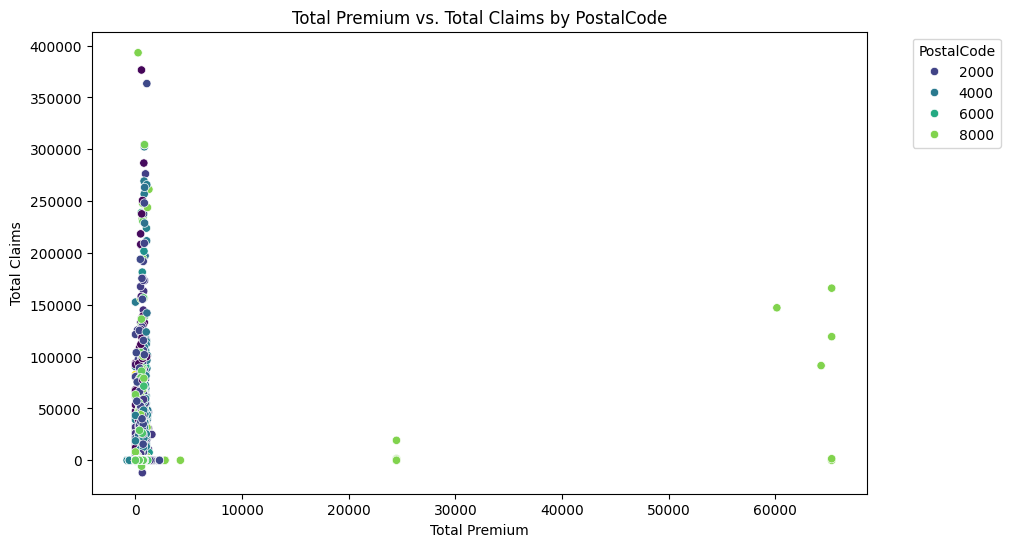

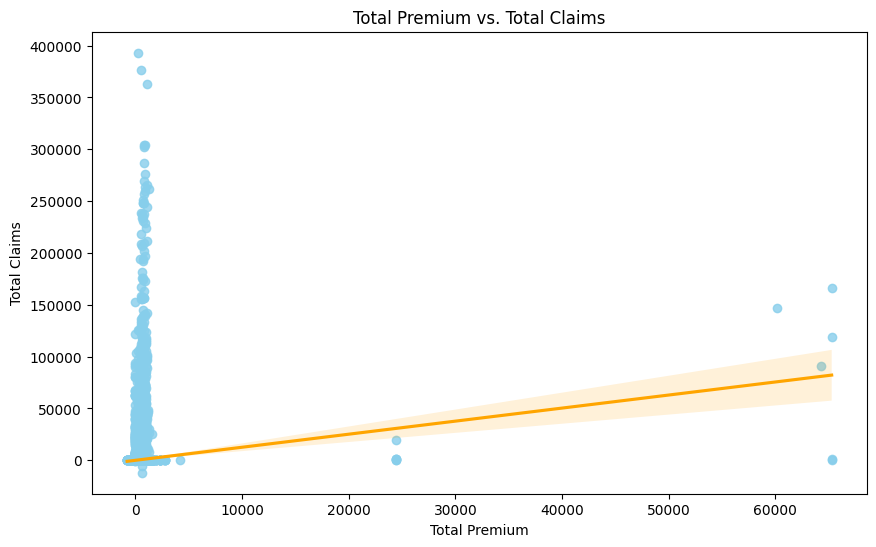

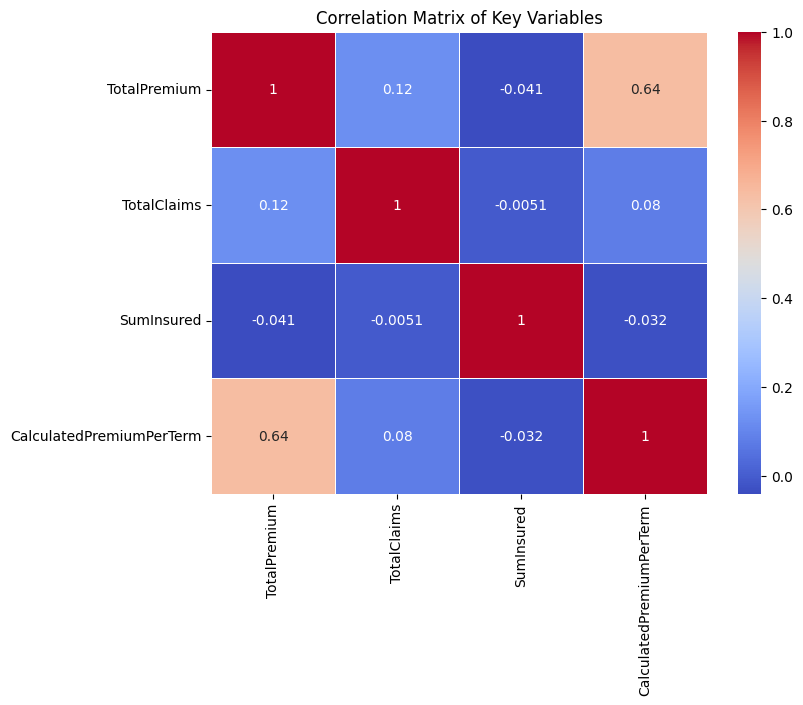

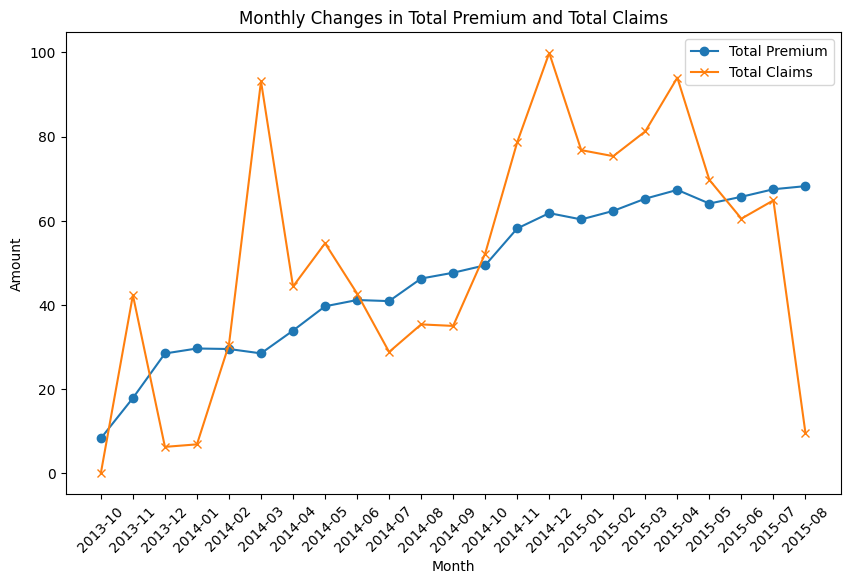

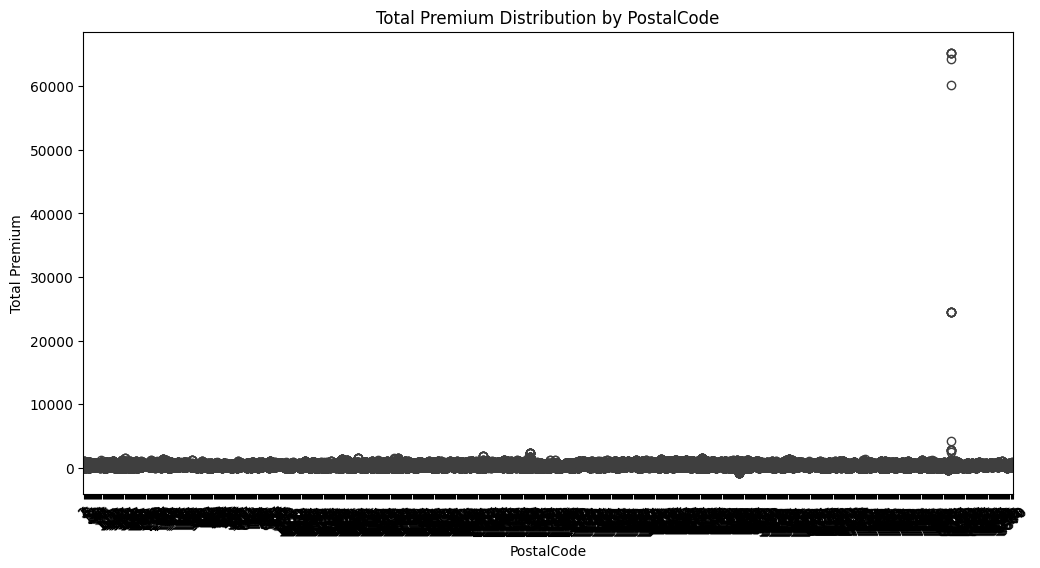

/var/folders/b3/zdl2xxh53jgc4hjrq6hk1p9c0000gn/T/ipykernel_2233/2517832196.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PostalCode', y='TotalPremium', data=premium_by_postalcode, palette='Blues_d')


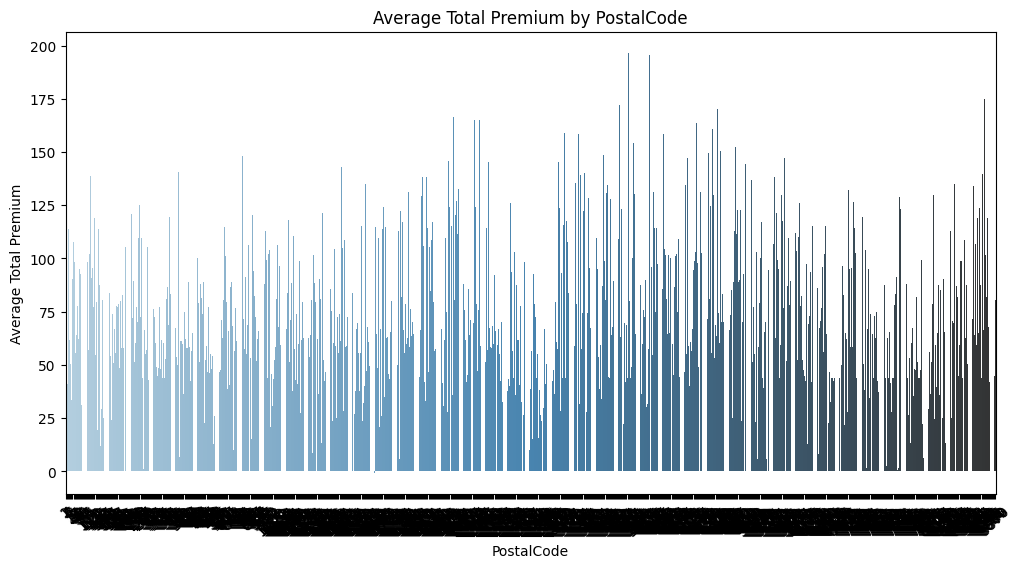

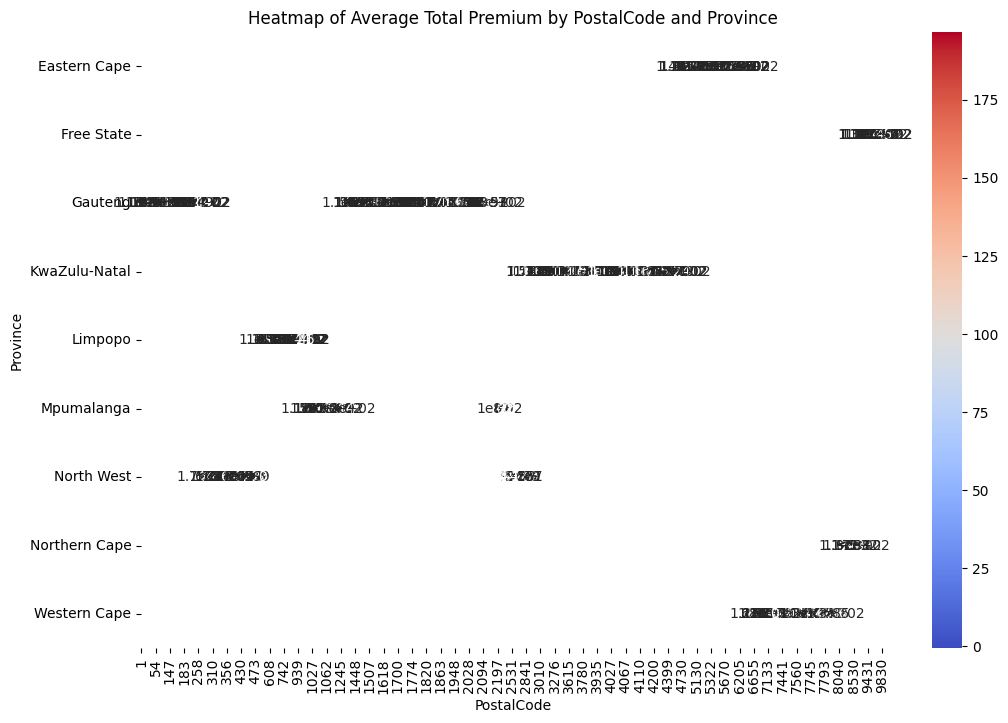

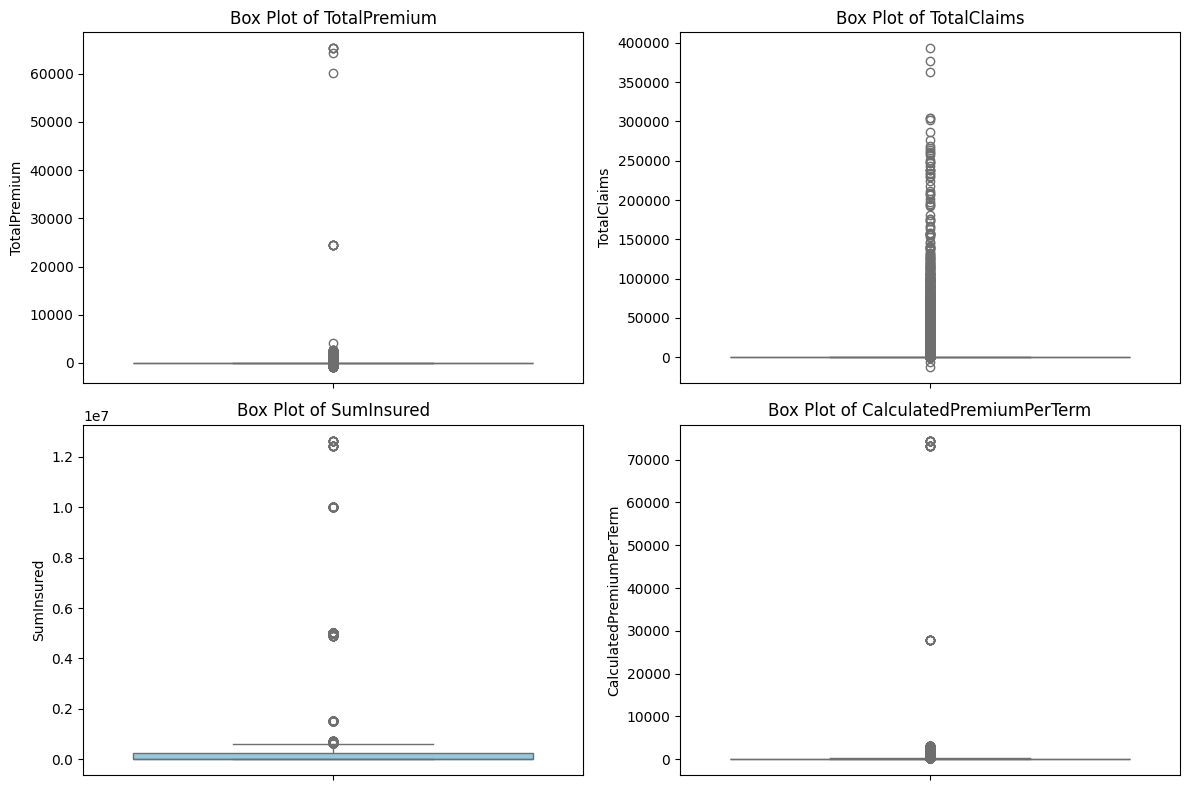

In [80]:
main()